In [1]:
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import utils
from scipy.optimize import minimize
import numpy as np

## Reading in Data

In [2]:
# Readin the dataframe and converting strings to dates and floats
btc_df = pd.read_csv("Data.csv", index_col=0, parse_dates=True)
btc_df["price"] = btc_df["price"].str.replace(",", "").astype(float)
btc_ar = btc_df.values

## First Autoregressive Model Experiment

Here we'll try to model the future price based on two days; one from a week ago and one from a month ago.

In [3]:
# Building the loss function
def loss_func(params):
    """
    Computes the loss function for the autoregressive linear model.
    """
    # Getting params
    beta0, beta1 = params

    # Computing predictions first
    predictions = np.array([beta0 * btc_ar[i - 30] + beta1 * btc_ar[i - 7] for i in range(30, 2000)])

    # Building the loss
    loss = np.linalg.norm((predictions - btc_ar[30:]))

    return loss

Optimal exposures: [-0.01392878  1.01865662]
Optimal loss:      171079.7939110602


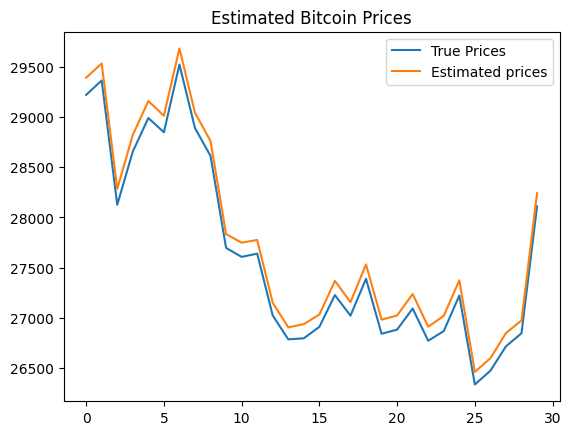

In [4]:
# Training the coefficients
x0 = [1, 1.1]
result = minimize(loss_func, x0)

print(f"Optimal exposures: {result.x}")
print(f"Optimal loss:      {result.fun}")

# Graphing the daily guesses
beta0, beta1 = result.x
predictions = np.array([beta1 * btc_ar[i - 30] + beta0 * btc_ar[i - 7] for i in range(30, 2000)])

plt.plot(btc_ar[1100:1130], label="True Prices")
plt.plot(predictions[1100:1130], label="Estimated prices")
plt.title("Estimated Bitcoin Prices")
plt.legend()
plt.show()

In [ ]:
def build_guess_column(df, shifts, params, val_name="price", new_name="estimation_column"):
    """
    Adds a new column to the input dataframe that builds the estimated values out of linear transformations of shifted columns.
    """
    df[new_name] = sum()
    return df[new_name].values()